In [2]:
import numpy as np
np.random.seed(2023 - 5 - 14)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# ___Linear Classifiers: Support Vector Machines___
-------------

In [3]:
# SVM uses the same linear form of function as regression but instead of predicting a continuous target value, it takes the output 
# of the linear function apply a sign function to get a binary output with two possible values -> corresponding to two class labels.

# If the target value > 0, the function returns +1
# and if it is < 0, the function returns -1.

In [4]:
# e.g. 

# ___$x$ &rarr; $fn$ &rarr; $\hat{y}$___

In [5]:
# x -> feature vector
# y_hat -> predicted class label

# ___$f(x, w, b)~=~sign(w \cdot x + b)$___

In [6]:
# Here the x is a feature vector (vector of features) and w is a weight vector (vector of feature weif.

# The (w . x + b) part is the output of the linear function.
# w . x is a dot product, where (w1, w2) . (x1, x2) = w1x1 + w2x2

# ___$=sign(\sum{w_ix_i + b})$___

In [7]:
# lets say we have 2 features x1 & x2

x1 = np.array([15. , 14.7, 14.4, 14.1, 13.8, 13.5, 13.2, 12.9, 12.6, 12.3, 12. ,
       11.7, 11.4, 11.1, 10.8, 10.5, 10.2,  9.9,  9.6,  9.3,  9. ,  8.7,
        8.4,  8.1,  7.8,  7.5,  7.2,  6.9,  6.6,  6.3,  6. ,  5.7,  5.4,
        5.1,  4.8,  4.5,  4.2,  3.9,  3.6,  3.3,  3. ,  2.7,  2.4,  2.1,
        1.8,  1.5,  1.2,  0.9,  0.6,  0.3])

x2 = np.array([ 1,  3,  2,  2,  2,  2,  4,  2,  3,  2,  1,  2,  4,  2,  4,  1,  1,
        0,  1,  2,  0,  1,  0,  0,  0,  0,  4,  4,  0,  2, 11, 11, 10, 13,
       10, 10, 10, 13, 11, 13, 14, 14, 12, 11, 12, 12, 12, 12, 13, 11])

In [8]:
x1.size

50

In [32]:
clrs = list(map(lambda x: "lightgreen" if x < 6 else "yellow", x2))

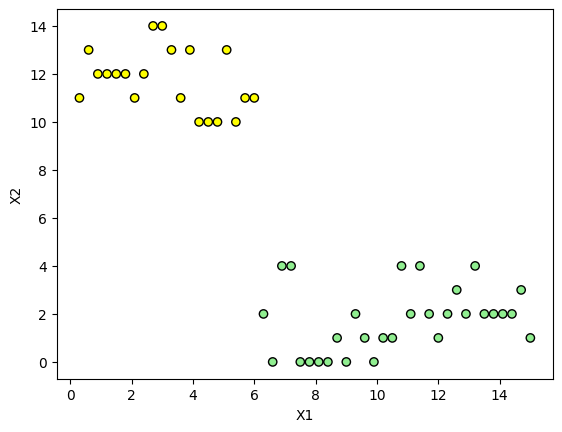

In [33]:
plt.scatter(x1, x2, marker = "o", c = clrs, edgecolor = "black")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

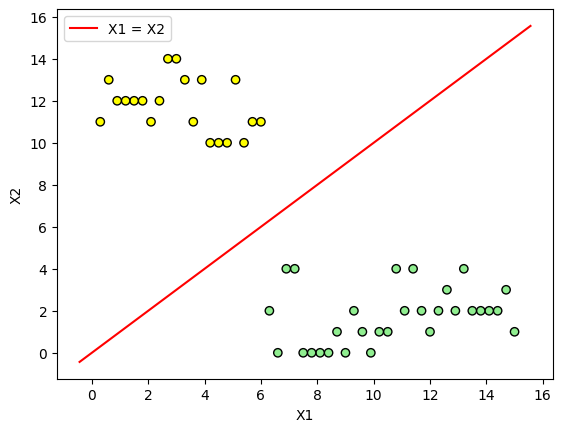

In [34]:
# Lets draw a line (decision boundary) x1 - x2 = 0
# x1 - x2 = 0 -> x1 = x2

plt.scatter(x1, x2, marker = "o", c = clrs, edgecolor = "black")
xlims = plt.gca().get_xlim()
l = np.arange(xlims[0], xlims[1], step = 0.2)
plt.plot(l, l, color = "red", label = "X1 = X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# ___$f(x, w, b)~=~sign(w \cdot x + b)$___

In [35]:
# In order to make x1 - x2 = 0 {i.e. x1 = x2}
# in the above equation, w1 & w2 must be {1, -1} or {-1, 1}
# and b must be 0.

# Only then, (w1 . x1) + (w2 . x2) will be equal to 0.

In [36]:
# So, now our equation is =sign(w1x1 + w2x2 + b)
# which becomes -> =sign(+1x1 + -1x2 + b)

# Say that we have an input [-.75, -2.25]
# y_hat = sign((-.75 x 1) + (-2.25 x -1) + 0)
# = sign(2.25 - .75)

2.25 - .75

1.5

In [37]:
# so =sign(1.5)
# = +1
# Output is positive one.

In [38]:
# Let's look at a different point [-1.75, -.25]
# y_hat = ((1 x -1.75) + (-1 x -.25) + 0)
# = .25 - 1.75

.25 - 1.75

-1.5

In [39]:
# =sign(-1.5)
# = -1
# The output is negative one.

In [40]:
# One way to define classifiers is by rewarding them for the amount of separation they can provide between the two classes.
# This introduces a concept of classifier margins.

# Informally, the margin is the width to which the decision boundary expanded before hitting a data point.

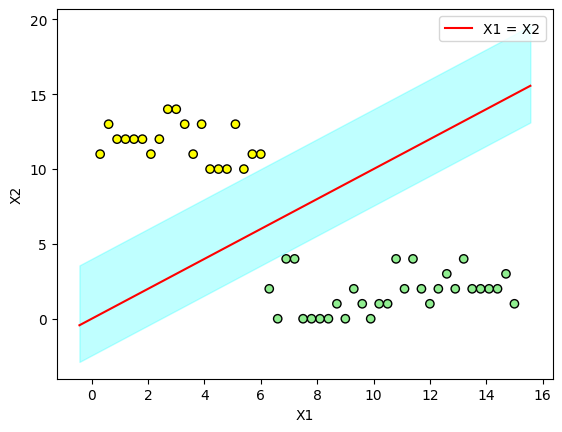

In [41]:
plt.scatter(x1, x2, marker = "o", c = clrs, edgecolor = "black")
xlims = plt.gca().get_xlim()
l = np.arange(xlims[0], xlims[1], step = 0.2)
plt.plot(l, l, color = "red", label = "X1 = X2")
plt.fill_between(l, y1 = l - 2.45, y2 = l + 4, color = "cyan", alpha = 0.25)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [42]:
# The region coloured in cyan represents the margin of the particular classifier.

In [ ]:
# The best classifier is the one that has the widest margin.
# This maximum margin classifier is called the Linear Support Vector Machine.
# also known as LSVM or SVM with a linear kernel.

## ___SVMs in Scikit-Learn___

In [45]:
f1 = np.random.randint(10, 100, size = 1000)
f2 = f1 + np.random.normal(loc = 2.5, scale = 5.675, size = 1000)          # adding some noise.
t = np.array([1 if f1[i] + f2[i] > 140 else 0 for i in range(1000)])

In [49]:
feats = np.stack([f1, f2], axis = 1)

In [50]:
train_x, test_x, train_y, test_y = train_test_split(feats, t, train_size = 0.8)

In [51]:
linSVC = SVC(kernel = "linear", C = 100).fit(train_x, train_y)

In [52]:
linSVC.score(test_x, test_y)

1.0

In [53]:
# The C parameter is the regularization parameter.
# This determines how tolerant the SVM is to misclassifying data points.

# REMEMBER the larger the C, the lower the regularization.
# Which makes the model to fit the training data as well as possible.
# Individual data points are important here.

# Lower C means more regularization.
# Model will be more tolerant to errors in individual data points.

# ___Linear Models: Pros and Cons___
-----------

In [54]:
# PROS

# - Simple and easy to train.
# - Fast predictions.
# - Scales well to large datasets.
# - Works well with sparse data.
# - Reasons for predictions are relatively easy to interpret.

In [ ]:
# CONS

# - For lower dimensional data, other models may offer better generalization.
# - For classification, the data may not be linearly separable.